In [24]:
# Basic steps to load a sample and see what's inside
import h5py

sample_path = "ttbar_20k.h5"

f = h5py.File(sample_path, 'r')
keys = list(f.keys())

print("Available keys : ", keys, " \n ")

key_dict = {} # store available variables for each key!

# See which variables are available in your dataset:
for k in keys:
    key_dict[k] = list(f[k].dtype.fields.keys())
    print(k," key has variables ", key_dict[k], " \n")

# Understand what each key shows
n_events = f["eventwise"].shape[0]
n_jets = f["jets"].shape[0] # = f["tracks"].shape[0] = f["truth_hadrons"].shape[0]
max_n_tracks =  f["tracks"].shape[1]
max_n_hadrons = f["truth_hadrons"].shape[1]


print(" --> My dataset has ", n_events, " events with ", n_jets, " jets. A maximum of ", max_n_tracks, " tracks and a maximum of ",  max_n_hadrons, " truth hadrons are stored for each jet.")

Available keys :  ['eventwise', 'jets', 'tracks', 'truth_hadrons']  
 
eventwise  key has variables  ['first_jet_index', 'n_jets', 'primaryVertexToBeamDisplacementX', 'primaryVertexToBeamDisplacementY', 'primaryVertexToBeamDisplacementZ', 'primaryVertexToTruthVertexDisplacementX', 'primaryVertexToTruthVertexDisplacementY', 'primaryVertexToTruthVertexDisplacementZ']  

jets  key has variables  ['GN2v01_pb', 'GN2v01_pc', 'GN2v01_pu', 'GN2v01_ptau', 'pt_btagJes', 'eta_btagJes', 'DL1dv01_pu', 'DL1dv01_pc', 'DL1dv01_pb', 'pt', 'eta', 'mass', 'ptFromTruthJet', 'phi', 'matchedToTruthJet', 'isJvtPU', 'isJvtHS', 'n_truth_promptLepton', 'HadronConeExclTruthLabelID', 'HadronConeExclExtendedTruthLabelID', 'mcEventWeight', 'eventNumber']  

tracks  key has variables  ['numberOfInnermostPixelLayerHits', 'numberOfNextToInnermostPixelLayerHits', 'numberOfInnermostPixelLayerSharedHits', 'numberOfInnermostPixelLayerSplitHits', 'numberOfPixelHits', 'numberOfPixelSharedHits', 'numberOfPixelSplitHits', 'nu

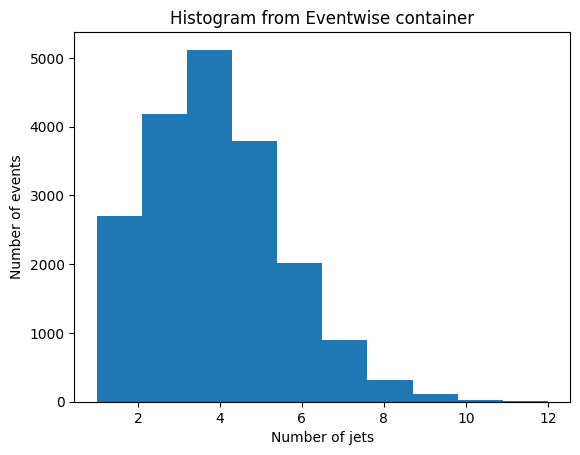

(79018,)


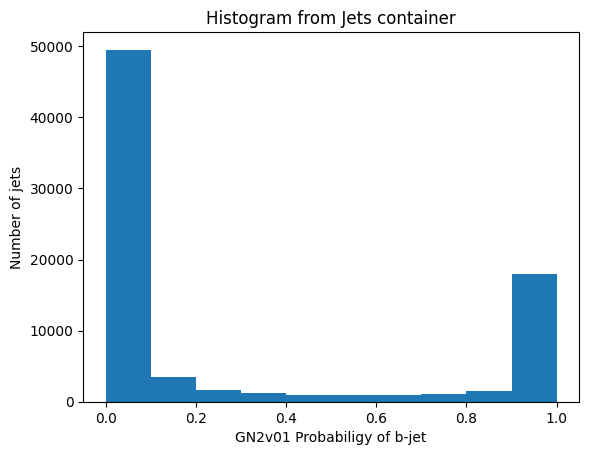

In [59]:
# Explore a variable and draw a distribution
import matplotlib.pyplot as plt
import numpy as np

# Plot the number of jets
plt.hist(f["eventwise"]["n_jets"])
plt.title("Histogram from Eventwise container")
plt.xlabel('Number of jets')
plt.ylabel('Number of events')
plt.show() 


# Plot the Jet Phi
print(f["jets"]["GN2v01_pb"].shape)
plt.hist(f["jets"]["GN2v01_pb"])
plt.title("Histogram from Jets container")
plt.xlabel('GN2v01 Probabiligy of b-jet')
plt.ylabel('Number of jets')
plt.show() 


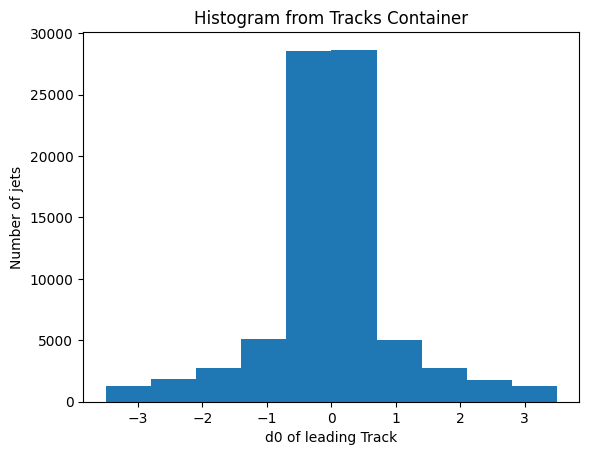

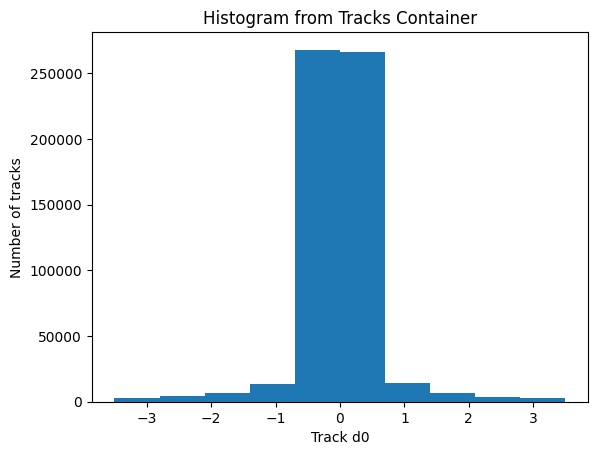

In [68]:
# Plot a track distribution - Note that the "tracks" container have a shape (n_jets, max_n_tracks).

# Plot the d0 for the leading track:
# Then plot
plt.hist(f["tracks"]["d0"][:, 0])
plt.title("Histogram from Tracks Container")
plt.xlabel('d0 of leading Track')
plt.ylabel('Number of jets')
plt.show() 

# Now plot the d0 distribution for all tracks

# Flatten your distribution to include all tracks in the jet
d0_tracks = (np.ndarray.flatten(f["tracks"]["d0"]))

# Remove NaN from jets where the n_tracks < max_n_tracks
d0_tracks[~np.isnan(d0_tracks)]

# Then plot
plt.hist(d0_tracks)
plt.title("Histogram from Tracks Container")
plt.xlabel('Track d0')
plt.ylabel('Number of tracks')
plt.show() 


Jet Phi has shape  (79018,)  and track dPhi has shape  (79018, 40)   -> The Jet Phi needs padding!
 -> Padded Jet Phi has shape  (79018, 40)
Track Phi has shape (n_jets, max_n_tracks) =  (79018, 40)


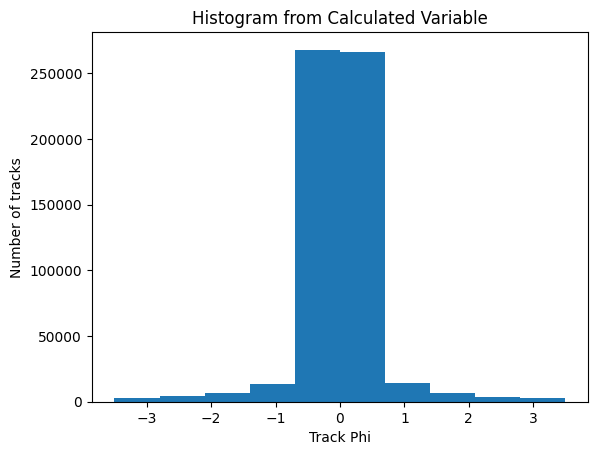

In [69]:
# Calculate Track Phi from the available variables: Track dPhi and Jet Phi

jet_phi = f["jets"]["phi"]
track_dphi = f["tracks"]["dphi"]

print("Jet Phi has shape ", jet_phi.shape, " and track dPhi has shape ", track_dphi.shape, "  -> The Jet Phi needs padding!")

# Pad Jet Phi
padded_jet_phi = np.repeat(jet_phi, max_n_tracks).reshape(n_jets, max_n_tracks) # This is needed because jets have a different format than tracks
print(" -> Padded Jet Phi has shape ", padded_jet_phi.shape)

# calculate Track Phi
track_phi = padded_jet_phi + track_dphi
track_phi = np.where(track_phi < -np.pi, 2*np.pi + (padded_jet_phi + track_dphi), track_phi)
track_phi = np.where(track_phi > np.pi, - 2*np.pi + (padded_jet_phi + track_dphi), track_phi)

print("Track Phi has shape (n_jets, max_n_tracks) = ", track_phi.shape)

# Flatten Track Phi and plot it!

# Flatten your distribution to include all tracks in the jet
phi_tracks = (np.ndarray.flatten(track_phi))

# Remove NaN from jets where the n_tracks < max_n_tracks
phi_tracks[~np.isnan(phi_tracks)]

              # Then plot
plt.hist(d0_tracks)
plt.title("Histogram from Calculated Variable")
plt.xlabel('Track Phi')
plt.ylabel('Number of tracks')
plt.show() 



